In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/My Drive/df_cleaned.csv')

In [ ]:
print(f"Dataset loaded with {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

In [ ]:
# let us see whether our cleaned dataset contains any null values.
dataset.isnull().sum()

,0
title,0
text,0
label,0
complete_text,0
clean_list,0
clean_text,0


In [ ]:
dataset.head()

,title,text,label,complete_text,clean_list,clean_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,"['enforcement', 'high', 'alert', 'following', ...",enforcement high alert following threats cops ...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"['unbelievable', 'obama', 'attorney', 'general...",unbelievable obama attorney general says charl...
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...","['bobby', 'jindal', 'raised', 'hindu', 'uses',...",bobby jindal raised hindu uses story christian...
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,"['satan', 'russia', 'unvelis', 'image', 'terri...",satan russia unvelis image terrifying supernuk...
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,"['time', 'christian', 'group', 'sues', 'amazon...",time christian group sues amazon splc designat...


In [ ]:
# Now let us two different datasets for fake and real news.Within the dataset 1=real and 0=fake news.
real = dataset[dataset['label']==1]
fake = dataset[dataset['label']==0]
print("size of real dataset: {}".format(real.shape))
print("size of fake dataset: {}".format(fake.shape))

size of real dataset: (36509, 6)
size of fake dataset: (35028, 6)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Define the input data
x = dataset['clean_text'].values.tolist()  # Convert to a list of strings
y = dataset['label'].values  # Labels

# Tokenization
total_words = 10000  # Limit to top 10,000 words
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(x)  # Fit on the entire text data

# Convert texts to sequences of integers
x_sequences = tokenizer.texts_to_sequences(x)

# Padding sequences to ensure uniform length
max_len_of_news = 200  # Set a fixed length for padding
x_padded = pad_sequences(x_sequences, maxlen=max_len_of_news, padding='post', truncating='post')

# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_padded, y, test_size=0.2, random_state=42, shuffle=True)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (57229, 200)
Test data shape: (14308, 200)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Input

# Define the model
model = Sequential()
model.add(Input(shape=(max_len_of_news,)))
model.add(Embedding(input_dim=total_words, output_dim=12))  # Use total_words as the input dimension
model.add(Bidirectional(LSTM(12, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(12)))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 12)             │         120,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 200, 24)             │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 200, 24)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 24)                  │           3,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,865 (495.57 KB)

 Trainable params: 126,865 (495.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Create a ModelCheckpoint callback that saves the model's weights every 5 epochs
checkpoint = ModelCheckpoint(filepath='model_weights_epoch_{epoch:02d}.weights.h5',
                             save_weights_only=True,
                             save_freq=5*len(x_train) // 50)  # 5 epochs worth of steps

# Create an EarlyStopping callback that stops training when the validation loss has not improved for 3 consecutive epochs
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model with the checkpoint and early stopping callbacks
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=50,
                    validation_split=0.1,
                    callbacks=[checkpoint, early_stop])

Epoch 1/20
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 0.9551 - val_loss: 0.3120
Epoch 2/20
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9544 - val_loss: 0.3493
Epoch 3/20
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9991 - loss: 0.0023 - val_accuracy: 0.9581 - val_loss: 0.3288
Epoch 4/20
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9591 - val_loss: 0.4483


In [ ]:
# Save the entire model after training is complete
model.save('baseline_model.h5')

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9525 - loss: 0.3587
Test Loss: 0.33255189657211304
Test Accuracy: 0.9545708894729614


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Predict the labels for the test data
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Print the classification report
print(classification_report(y_test, y_pred_classes, target_names=['Fake', 'Real']))

448/448 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step
              precision    recall  f1-score   support

        Fake       0.95      0.95      0.95      7081
        Real       0.95      0.96      0.96      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



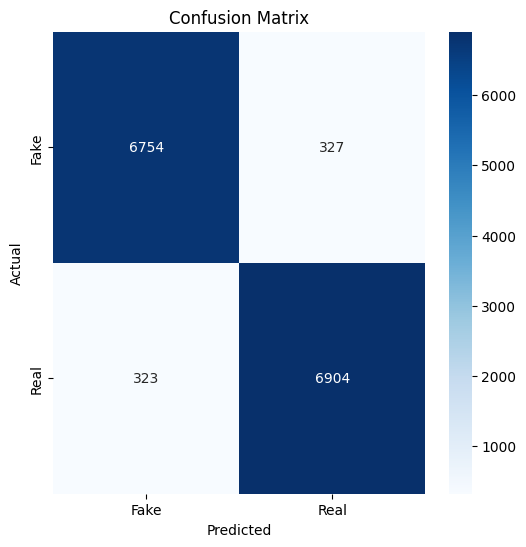

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

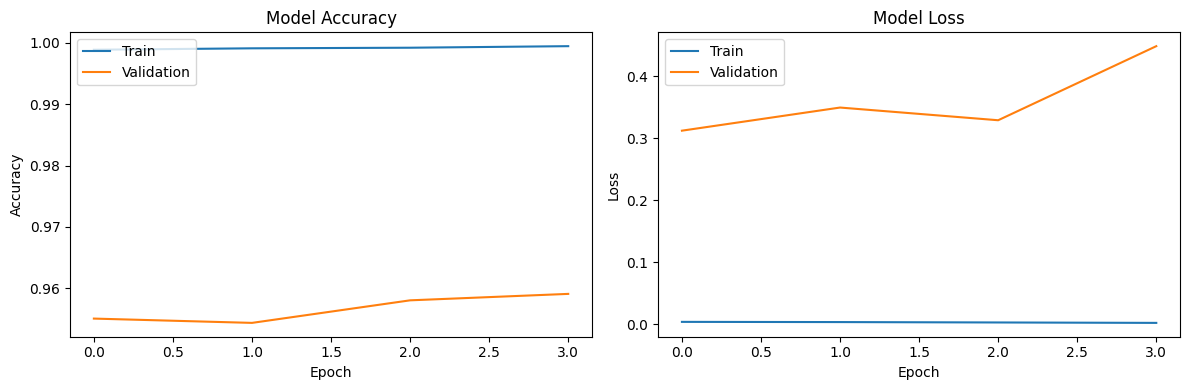

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('baseline_model.h5')

In [ ]:
def preprocess_text(text, tokenizer, max_len):
    # Tokenize the input text
    sequences = tokenizer.texts_to_sequences([text])
    # Pad the sequence
    padded_sequence = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
    return padded_sequence

def classify_news(text, model, tokenizer, max_len):
    # Preprocess the text
    preprocessed_text = preprocess_text(text, tokenizer, max_len)
    # Predict with the model
    prediction = model.predict(preprocessed_text)
    # Convert prediction to label
    if prediction >= 0.5:
        return "Real"
    else:
        return "Fake"

In [ ]:
def user_input_interface():
    # Get input from the user
    user_input = input("Please enter the news text you want to classify: ")

    # Classify the input
    result = classify_news(user_input, model, tokenizer, max_len_of_news)

    # Output the result
    print(f"The news is classified as: {result}")

In [ ]:
# Run the interface in a loop
while True:
    user_input_interface()
    # Ask the user if they want to classify another text
    cont = input("Do you want to classify another news? (yes/no): ").strip().lower()
    if cont != 'yes':
        break

Please enter the news text you want to classify: MOGADISHU (Reuters) - More than 200 people were killed by twin bomb blasts that struck busy junctions in the heart of Somalia s capital Mogadishu, officials said on Sunday, marking the deadliest attacks since an Islamist insurgency began in 2007. President Mohamed Abdullahi Farmaajo declared three days of national mourning and called for donations of blood and funds to victims of Saturday s attack. At least 100 others were wounded.  Today s horrific attack proves our enemy would stop nothing to cause our people pain and suffering. Let s unite against terror,  he tweeted.  Police said a truck bomb exploded outside a hotel in the K5 intersection that is lined with government offices, restaurants and kiosks, flattening several buildings and setting dozens of vehicles on fire. Two hours later, another blast struck the capital s Medina district.  We have confirmed 200 civilians died in yesterday s blast. We understand the death toll is higher

In [ ]:
# Sample fake news data (preprocessed and ready for input)
fake_news_samples = [
    "Breaking: Government confirms that a new virus has been created in the lab and will spread globally.",
    "Scientists discovered that drinking coffee increases the risk of getting cancer by 80%.",
    "A secret message from an alien civilization has been intercepted by the NSA.",
    "The stock market will crash tomorrow due to insider information leaked from major banks.",
    "New miracle drug can cure all diseases, pharmaceutical companies try to hide it from the public."
]

# Preprocess the sample data using the same tokenizer and padding you've used
fake_news_sequences = tokenizer.texts_to_sequences(fake_news_samples)
fake_news_padded = pad_sequences(fake_news_sequences, maxlen=max_len_of_news, padding='post', truncating='post')

# Predict using your model
fake_news_predictions = model.predict(fake_news_padded)
fake_news_results = (fake_news_predictions > 0.5).astype("int32")

# Output the results
for i, news in enumerate(fake_news_samples):
    label = "Real" if fake_news_results[i] == 1 else "Fake"
    print(f"News: {news}")
    print(f"Predicted Label: {label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
News: Breaking: Government confirms that a new virus has been created in the lab and will spread globally.
Predicted Label: Real

News: Scientists discovered that drinking coffee increases the risk of getting cancer by 80%.
Predicted Label: Real

News: A secret message from an alien civilization has been intercepted by the NSA.
Predicted Label: Real

News: The stock market will crash tomorrow due to insider information leaked from major banks.
Predicted Label: Real

News: New miracle drug can cure all diseases, pharmaceutical companies try to hide it from the public.
Predicted Label: Real

